# Temperature Forecast Project using ML

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [4]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
#Drop the null Values.
df.dropna(inplace=True)

In [9]:
tabel=[]

for i in df.columns:
    tabel.append([i,df[i].nunique(),df[i].drop_duplicates().values])
    
pd.DataFrame(tabel,columns=['Features','Uniques Numbers','Values'])

Features  Uniques Numbers  \
0            station               25   
1               Date              307   
2       Present_Tmax              167   
3       Present_Tmin              155   
4        LDAPS_RHmin             7585   
5        LDAPS_RHmax             7577   
6   LDAPS_Tmax_lapse             7588   
7   LDAPS_Tmin_lapse             7588   
8           LDAPS_WS             7588   
9           LDAPS_LH             7588   
10         LDAPS_CC1             7485   
11         LDAPS_CC2             7496   
12         LDAPS_CC3             7512   
13         LDAPS_CC4             7438   
14        LDAPS_PPT1             2779   
15        LDAPS_PPT2             2479   
16        LDAPS_PPT3             2326   
17        LDAPS_PPT4             1892   
18               lat               12   
19               lon               25   
20               DEM               25   
21             Slope               25   
22   Solar radiation             1575   
23         Next_Tmax              181   
24         Next_Tmin              157   

                                               Values  
0   [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...  
1   [30-06-2013, 01-07-2013, 02-07-2013, 03-07-201...  
2   [28.7, 31.9, 31.6, 32.0, 31.4, 32.1, 31.7, 31....  
3   [21.4, 21.6, 23.3, 23.4, 21.9, 23.5, 24.4, 23....  
4   [58.25568771, 52.26339722, 48.69047928, 58.239...  
5   [91.11636353, 90.60472107, 83.97358704, 96.483...  
6   [28.07410146, 29.85068856, 30.09129171, 29.704...  
7   [23.00693617, 24.03500932, 24.56563342, 23.326...  
8   [6.818886966, 5.6918899320000005, 6.1382236779...  
9   [69.45180527, 51.93744783, 20.57304966, 65.727...  
10  [0.23394747100000002, 0.22550819800000002, 0.2...  
11  [0.20389571, 0.251771373, 0.257469446, 0.22600...  
12  [0.161696854, 0.159444059, 0.204091465, 0.1611...  
13  [0.130928198, 0.127727264, 0.14212525, 0.13424...  
14  [0.0, 0.804222465, 0.46474445700000006, 0.5431...  
15  [0.0, 9.933111086, 11.83342134, 11.49145773, 9...  
16  [0.0, 0.237004317, 0.253719132, 0.271108305, 0...  
17  [0.0, 0.8480815429999999, 1.513873922, 2.75996...  
18  [37.6046, 37.5776, 37.645, 37.5507, 37.5102, 3...  
19  [126.991, 127.03200000000001, 127.057999999999...  
20  [212.335, 44.7624, 33.3068, 45.716, 35.0380000...  
21  [2.785, 0.5141, 0.2661, 2.5348, 0.5055, 0.1457...  
22  [5992.895996, 5869.3125, 5863.555664, 5856.964...  
23  [29.1, 30.5, 31.1, 31.7, 31.2, 31.5, 30.9, 31....  
24  [21.2, 22.5, 23.9, 24.3, 24.0, 23.4, 22.9, 21....

In [10]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

# Visualisation

In [11]:
df.dropna()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936  6.818887   69.451805   
1       90.604721         29.850689         24.035009  5.691890   51.937448   
2       83.973587         30.091292         24.565633  6.138224   20.573050   
3       96.483688         29.704629         23.326177  5.650050   65.727144   
4       90.155128         29.113934         23.486480  5.735004  107.965535   
...           ...               ...               ...       ...         ...   
7745    78.261383         27.812697         18.303014  6.603253    9.614074   
7746    83.690018         26.704905         17.814038  5.768083   82.146707   
7747    78.869858         26.352081         18.775678  6.148918   72.058294   
7748    77.294975         27.010193         18.733519  6.542819   47.241457   
7749    77.243744         27.939516         18.522965  7.289264    9.090034   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...         0.0         0.0         0.0  37.6046  126.991  212.3350   
1     ...         0.0         0.0         0.0  37.6046  127.032   44.7624   
2     ...         0.0         0.0         0.0  37.5776  127.058   33.3068   
3     ...         0.0         0.0         0.0  37.6450  127.022   45.7160   
4     ...         0.0         0.0         0.0  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7745  ...         0.0         0.0         0.0  37.5507  127.040   26.2980   
7746  ...         0.0         0.0         0.0  37.5102  127.086   21.9668   
7747  ...         0.0         0.0         0.0  37.5372  126.891   15.5876   
7748  ...         0.0         0.0         0.0  37.5237  126.909   17.2956   
7749  ...         0.0         0.0         0.0  37.5237  126.970   19.5844   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.7850      5992.895996       29.1       21.2  
1     0.5141      5869.312500       30.5       22.5  
2     0.2661      5863.555664       31.1       23.9  
3     2.5348      5856.964844       31.7       24.3  
4     0.5055      5859.552246       31.2       22.5  
...      ...              ...        ...        ...  
7745  0.5721      4456.024414       27.6       17.7  
7746  0.1332      4441.803711       28.0       17.1  
7747  0.1554      4443.313965       28.3       18.1  
7748  0.2223      4438.373535       28.6       18.8  
7749  0.2713      4451.345215       27.8       17.4  

[7588 rows x 25 columns]

In [12]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [13]:
df.drop('Date',axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Present_Tmin Vs Present_Tmax')

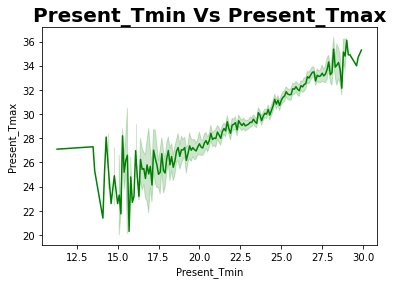

In [17]:
sns.lineplot(x=df['Present_Tmin'],y=df['Present_Tmax'],data=df,color='green')
plt.title('Present_Tmin Vs Present_Tmax',fontdict={'fontweight':'bold','fontsize':20})

Text(0.5, 1.0, 'LDAPS_RHmax Vs Present_Tmax')

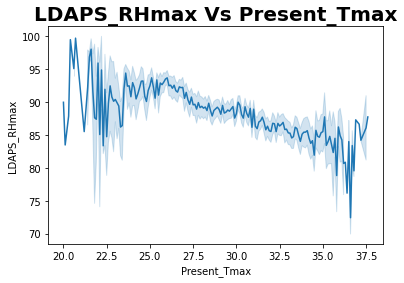

In [18]:
sns.lineplot(x=df['Present_Tmax'],y=df['LDAPS_RHmax'],data=df)
plt.title('LDAPS_RHmax Vs Present_Tmax',fontdict={'fontweight':'bold','fontsize':20})

Text(0.5, 1.0, 'LDAPS_Tmax_lapse Vs LDAPS_RHmin')

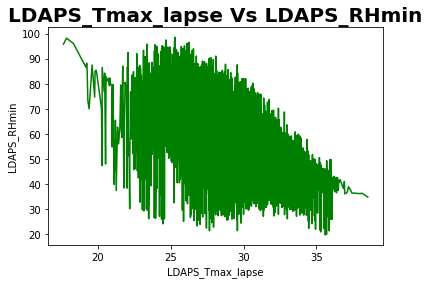

In [20]:
sns.lineplot(x=df['LDAPS_Tmax_lapse'],y=df['LDAPS_RHmin'],data=df,color='green')
plt.title('LDAPS_Tmax_lapse Vs LDAPS_RHmin',fontdict={'fontweight':'bold','fontsize':20})

Text(0.5, 1.0, 'LDAPS_Tmin_lapse Vs LDAPS_RHmax')

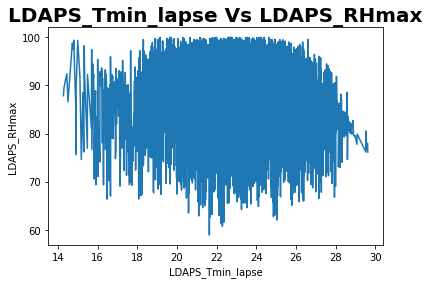

In [21]:
sns.lineplot(x=df['LDAPS_Tmin_lapse'],y=df['LDAPS_RHmax'],data=df)
plt.title('LDAPS_Tmin_lapse Vs LDAPS_RHmax',fontdict={'fontweight':'bold','fontsize':20})

Text(0.5, 1.0, 'LDAPS_Tmin_lapse Vs LDAPS_WS')

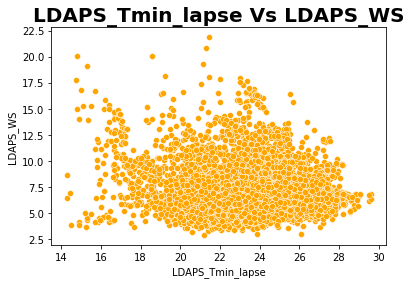

In [22]:
sns.scatterplot(x=df['LDAPS_Tmin_lapse'],y=df['LDAPS_WS'],data=df,color='orange')
plt.title('LDAPS_Tmin_lapse Vs LDAPS_WS',fontdict={'fontweight':'bold','fontsize':20})

In [23]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmax'>

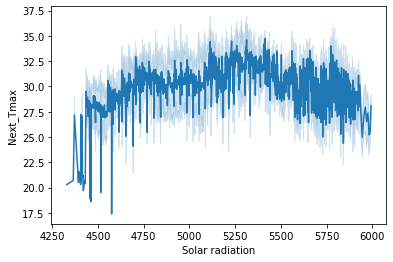

In [24]:
sns.lineplot(x=df['Solar radiation'],y=df['Next_Tmax'],data=df)

Text(0.5, 1.0, 'Solar radiation Vs Next_Tmin')

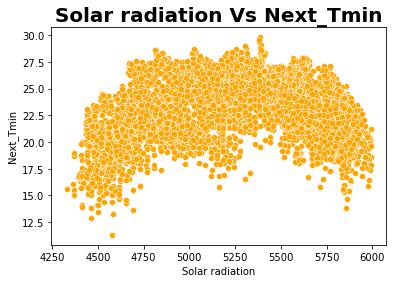

In [26]:
sns.scatterplot(x=df['Solar radiation'],y=df['Next_Tmin'],data=df,color='orange')
plt.title('Solar radiation Vs Next_Tmin',fontdict={'fontweight':'bold','fontsize':20})

In [28]:
import folium

In [30]:
Temp_Forecast=df[['lat','lon','station']]
map = folium.Map(location=[Temp_Forecast.lat.mean(), Temp_Forecast.lon.mean()], zoom_start=5, control_scale=True)
for index, location_info in Temp_Forecast.iterrows():
    folium.Marker([location_info["lat"], location_info["lon"]], popup=location_info["station"]).add_to(map)

In [31]:
map

In [27]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

<AxesSubplot:>

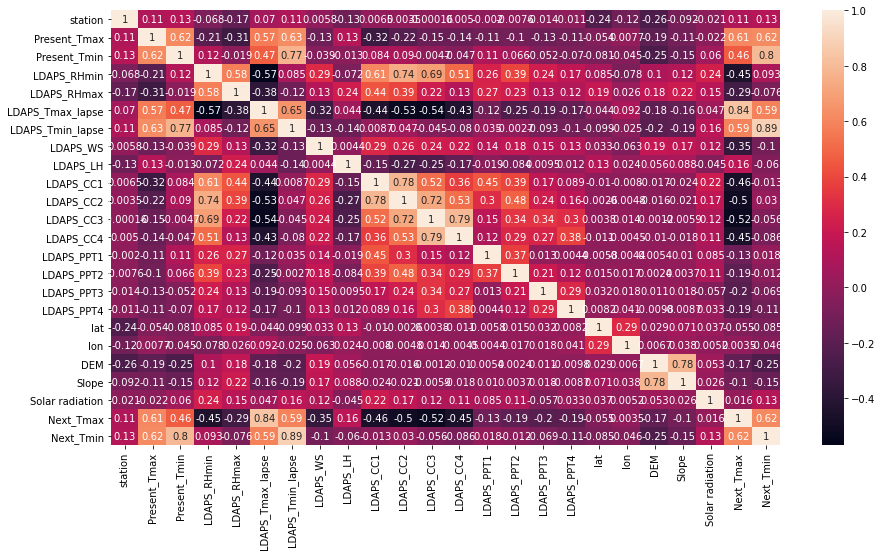

In [244]:
corr=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=corr,annot=True)

# Data Cleaning

Removing Outliers

In [245]:
from scipy.stats import zscore

In [246]:
z=np.abs(zscore(df))

In [247]:
df.shape

(7588, 24)

In [248]:
df_new=df[(z<3).all(axis=1)]

In [249]:
df_new.shape

(6739, 24)

In [250]:
loss=(7588-6739)/7588*100
loss

11.188719030047443

In [251]:
df=df_new

In [32]:
#Creat Two Target Variable 
#one is Next Tmax 
#One is Next Tmin

In [252]:
x=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y1=df['Next_Tmax']
y2=df['Next_Tmin']

In [253]:
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      ...  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
0     ...   0.130928         0.0         0.0         0.0         0.0  37.6046   
1     ...   0.127727         0.0         0.0         0.0         0.0  37.6046   
2     ...   0.142125         0.0         0.0         0.0         0.0  37.5776   
3     ...   0.134249         0.0         0.0         0.0         0.0  37.6450   
4     ...   0.170021         0.0         0.0         0.0         0.0  37.5507   
...   ...        ...         ...         ...         ...         ...      ...   
7745  ...   0.004380         0.0         0.0         0.0         0.0  37.5507   
7746  ...   0.017678         0.0         0.0         0.0         0.0  37.5102   
7747  ...   0.000000         0.0         0.0         0.0         0.0  37.5372   
7748  ...   0.000000         0.0         0.0         0.0         0.0  37.5237   
7749  ...   0.000796         0.0         0.0         0.0         0.0  37.5237   

          lon       DEM   Slope  Solar radiation  
0     126.991  212.3350  2.7850      5992.895996  
1     127.032   44.7624  0.5141      5869.312500  
2     127.058   33.3068  0.2661      5863.555664  
3     127.022   45.7160  2.5348      5856.964844  
4     127.135   35.0380  0.5055      5859.552246  
...       ...       ...     ...              ...  
7745  127.040   26.2980  0.5721      4456.024414  
7746  127.086   21.9668  0.1332      4441.803711  
7747  126.891   15.5876  0.1554      4443.313965  
7748  126.909   17.2956  0.2223      4438.373535  
7749  126.970   19.5844  0.2713      4451.345215  

[6739 rows x 22 columns]

In [254]:
x.drop('station',axis=1,inplace=True)

In [255]:
x

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0             28.7          21.4    58.255688    91.116364         28.074101   
1             31.9          21.6    52.263397    90.604721         29.850689   
2             31.6          23.3    48.690479    83.973587         30.091292   
3             32.0          23.4    58.239788    96.483688         29.704629   
4             31.4          21.9    56.174095    90.155128         29.113934   
...            ...           ...          ...          ...               ...   
7745          23.1          17.8    24.688997    78.261383         27.812697   
7746          22.5          17.4    30.094858    83.690018         26.704905   
7747          23.3          17.1    26.741310    78.869858         26.352081   
7748          23.3          17.7    24.040634    77.294975         27.010193   
7749          23.2          17.4    22.933014    77.243744         27.939516   

      LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0            23.006936  6.818887   69.451805   0.233947   0.203896  ...   
1            24.035009  5.691890   51.937448   0.225508   0.251771  ...   
2            24.565633  6.138224   20.573050   0.209344   0.257469  ...   
3            23.326177  5.650050   65.727144   0.216372   0.226002  ...   
4            23.486480  5.735004  107.965535   0.151407   0.249995  ...   
...                ...       ...         ...        ...        ...  ...   
7745         18.303014  6.603253    9.614074   0.052902   0.030169  ...   
7746         17.814038  5.768083   82.146707   0.066461   0.024518  ...   
7747         18.775678  6.148918   72.058294   0.030034   0.081035  ...   
7748         18.733519  6.542819   47.241457   0.035874   0.074962  ...   
7749         18.522965  7.289264    9.090034   0.048954   0.059869  ...   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
0      0.130928         0.0         0.0         0.0         0.0  37.6046   
1      0.127727         0.0         0.0         0.0         0.0  37.6046   
2      0.142125         0.0         0.0         0.0         0.0  37.5776   
3      0.134249         0.0         0.0         0.0         0.0  37.6450   
4      0.170021         0.0         0.0         0.0         0.0  37.5507   
...         ...         ...         ...         ...         ...      ...   
7745   0.004380         0.0         0.0         0.0         0.0  37.5507   
7746   0.017678         0.0         0.0         0.0         0.0  37.5102   
7747   0.000000         0.0         0.0         0.0         0.0  37.5372   
7748   0.000000         0.0         0.0         0.0         0.0  37.5237   
7749   0.000796         0.0         0.0         0.0         0.0  37.5237   

          lon       DEM   Slope  Solar radiation  
0     126.991  212.3350  2.7850      5992.895996  
1     127.032   44.7624  0.5141      5869.312500  
2     127.058   33.3068  0.2661      5863.555664  
3     127.022   45.7160  2.5348      5856.964844  
4     127.135   35.0380  0.5055      5859.552246  
...       ...       ...     ...              ...  
7745  127.040   26.2980  0.5721      4456.024414  
7746  127.086   21.9668  0.1332      4441.803711  
7747  126.891   15.5876  0.1554      4443.313965  
7748  126.909   17.2956  0.2223      4438.373535  
7749  126.970   19.5844  0.2713      4451.345215  

[6739 rows x 21 columns]

Removing Skewness

In [256]:
from sklearn.preprocessing import power_transform

In [257]:
for i in x:
    x[i]=np.sqrt(x[i])

In [258]:
x.skew()

Present_Tmax       -0.385978
Present_Tmin       -0.351776
LDAPS_RHmin         0.015936
LDAPS_RHmax        -0.776547
LDAPS_Tmax_lapse   -0.232886
LDAPS_Tmin_lapse   -0.512802
LDAPS_WS            0.735377
LDAPS_LH            0.000881
LDAPS_CC1          -0.165760
LDAPS_CC2          -0.285175
LDAPS_CC3          -0.092441
LDAPS_CC4           0.010396
LDAPS_PPT1          2.451176
LDAPS_PPT2          3.115912
LDAPS_PPT3          3.365579
LDAPS_PPT4          3.709695
lat                 0.105836
lon                -0.278145
DEM                 1.173816
Slope               0.880825
Solar radiation    -0.568938
dtype: float64

In [259]:
x.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            1
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
dtype: int64

In [260]:
x['LDAPS_LH']=x['LDAPS_LH'].fillna(x['LDAPS_LH'].mean())

In [261]:
x.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
dtype: int64

# Tmax As Target Variable

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [263]:
ln=LinearRegression()

# Random State Selection

In [264]:
for i in range(1,1000):
    x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.20,random_state=i)
    ln.fit(x_train,y1_train)
    pred_train=ln.predict(x_train)
    pred_test=ln.predict(x_test)
    if round(r2_score(y1_train,pred_train)*100,2)==round(r2_score(y1_test,pred_test)*100,2):
        print('At Random state',i,'score is well')
        print('Train score',r2_score(y1_train,pred_train))
        print('Test Score',r2_score(y1_test,pred_test))

At Random state 726 score is well
Train score 0.7563783485064495
Test Score 0.7564074529369589


In [265]:
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.20,random_state=726)

# PCA

In [266]:
from sklearn.decomposition import PCA

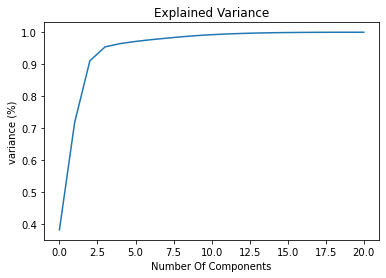

In [267]:
pca=PCA()
principalComponents=pca.fit_transform(x_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number Of Components')
plt.ylabel('variance (%)')
plt.title("Explained Variance")
plt.show()

From This chart We Select n_components=7

In [268]:
pca=PCA(n_components=7)
X_train=pca.fit_transform(x_train)

In [269]:
x_train=X_train

In [270]:
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.20,random_state=726)

In [271]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [272]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
knn=KNeighborsRegressor()
dtc=DecisionTreeRegressor()

In [273]:
def fun(f):
    f.fit(x_train,y1_train)
    pred=f.predict(x_test)
    print('Taining Score:-',f.score(x_train,y1_train)*100)
    print('Testing Score:-',f.score(x_test,y1_test)*100)
    print('Mean Absolute Error',mean_absolute_error(y1_test,pred))
    print('Mean Squared Error',mean_squared_error(y1_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y1_test,pred)))
    print('R2 Score',r2_score(y1_test,pred))

In [274]:
fun(ln)

Taining Score:- 75.63783485064495
Testing Score:- 75.64074529369589
Mean Absolute Error 1.1096115470586854
Mean Squared Error 2.1681100353445335
Root Mean Squared Erro 1.4724503507230842
R2 Score 0.7564074529369589


In [275]:
fun(svr)

Taining Score:- 30.54029157504454
Testing Score:- 30.785172628198254
Mean Absolute Error 1.9970309039184042
Mean Squared Error 6.160507110285535
Root Mean Squared Erro 2.482036887374065
R2 Score 0.30785172628198254


In [276]:
fun(svrl)

Taining Score:- 74.91528160261282
Testing Score:- 75.5803553626817
Mean Absolute Error 1.0995874704658017
Mean Squared Error 2.1734850772759975
Root Mean Squared Erro 1.4742744240052452
R2 Score 0.7558035536268171


In [277]:
fun(svrp)

Taining Score:- 44.41515751065579
Testing Score:- 45.046266565255024
Mean Absolute Error 1.7486761756717508
Mean Squared Error 4.891189914307369
Root Mean Squared Erro 2.211603471309305
R2 Score 0.4504626656525502


In [278]:
fun(dtc)

Taining Score:- 100.0
Testing Score:- 73.08674603441496
Mean Absolute Error 1.0798219584569733
Mean Squared Error 2.3954302670623147
Root Mean Squared Erro 1.5477177607891934
R2 Score 0.7308674603441495


In [279]:
fun(knn)

Taining Score:- 79.25482417465601
Testing Score:- 69.94834443480104
Mean Absolute Error 1.2727596439169138
Mean Squared Error 2.674765578635015
Root Mean Squared Erro 1.6354710571070998
R2 Score 0.6994834443480105


# Regulization

In [280]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [281]:
ls=Lasso()
rd=Ridge()
es=ElasticNet()

In [282]:
fun(ls)

Taining Score:- 3.9962620483735334
Testing Score:- 3.701362515875739
Mean Absolute Error 2.385434825370291
Mean Squared Error 8.571117829204429
Root Mean Squared Erro 2.927647149026745
R2 Score 0.03701362515875739


In [283]:
fun(rd)

Taining Score:- 75.35707496236468
Testing Score:- 75.65381951654459
Mean Absolute Error 1.1111343340535766
Mean Squared Error 2.1669463563196882
Root Mean Squared Erro 1.4720551471733958
R2 Score 0.7565381951654458


In [284]:
fun(es)

Taining Score:- 13.624990515356739
Testing Score:- 13.499251425444426
Mean Absolute Error 2.2551911074719375
Mean Squared Error 7.699050866312942
Root Mean Squared Erro 2.774716357812622
R2 Score 0.13499251425444425


# Ensemble Mathod

In [285]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.linear_model import SGDRegressor

In [286]:
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()
sgd=SGDRegressor()
bg=BaggingRegressor()

In [287]:
fun(rf)

Taining Score:- 98.38674263259375
Testing Score:- 88.43483647923759
Mean Absolute Error 0.7462700296735904
Mean Squared Error 1.0293642967359045
Root Mean Squared Erro 1.0145759196511144
R2 Score 0.8843483647923759


In [288]:
fun(ad)

Taining Score:- 76.38385027762247
Testing Score:- 75.65895192609106
Mean Absolute Error 1.1704782585079863
Mean Squared Error 2.1664895431381117
Root Mean Squared Erro 1.4718999772872177
R2 Score 0.7565895192609107


In [289]:
fun(gd)

Taining Score:- 86.46382582655792
Testing Score:- 83.55278602541718
Mean Absolute Error 0.9064012862698015
Mean Squared Error 1.4638941175208995
Root Mean Squared Erro 1.209914921604366
R2 Score 0.8355278602541718


In [290]:
fun(sgd)

Taining Score:- -1.3544949419479458e+25
Testing Score:- -1.2811497458509879e+25
Mean Absolute Error 1062901295990.7733
Mean Squared Error 1.140294994345525e+24
Root Mean Squared Erro 1067845960026.7845
R2 Score -1.2811497458509878e+23


In [291]:
fun(bg)

Taining Score:- 97.55932717103654
Testing Score:- 86.39255731103583
Mean Absolute Error 0.8081305637982197
Mean Squared Error 1.2111385756676558
Root Mean Squared Erro 1.10051741270534
R2 Score 0.8639255731103583


# HyperTuning For Best Score

RandomForest Classifier

In [74]:
p1={'criterion':['mse','absolute_error','possion'],'n_estimators':[10,50,75,100,200,250,500],'max_features':['auto','log2','sqrt'],'bootstrap':['True','False']}

In [76]:
gd1=GridSearchCV(rf,p1)
gd1.fit(x,y1)
print(gd1.best_params_)

{'bootstrap': 'False', 'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 500}


In [91]:
rf1=RandomForestRegressor(criterion='mse',n_estimators=100,max_features='log2',bootstrap=True)

In [92]:
fun(rf1)

Taining Score:- 98.66751548696881
Mean Absolute Error 0.7057316644707943
Mean Squared Error 0.8943251545893712
Root Mean Squared Erro 0.9456876622804018
R2 Score 0.9064558533173607


KNeighbours

In [93]:
p2={'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}

In [94]:
gd2=GridSearchCV(knn,p2)
gd2.fit(x,y1)
print(gd2.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [95]:
knn1=KNeighborsRegressor(n_neighbors=5,algorithm='auto',p=1,weights='distance')

In [96]:
fun(knn1)

Taining Score:- 100.0
Mean Absolute Error 0.8585799646788944
Mean Squared Error 1.2910083333672813
Root Mean Squared Erro 1.1362254764646325
R2 Score 0.8649637972438913


Ridge

In [301]:
p3={'alpha':[0.1,0.001,0.0001,0.01,1,10],'fit_intercept':['True','False'],'normalize':['True','False'],'copy_X':['True','False'],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs'],'max_iter':[1000,1500,2000,5000,15000]}

In [302]:
gd2=GridSearchCV(rd,p3)
gd2.fit(x,y1)
print(gd2.best_params_)

{'alpha': 0.1, 'copy_X': 'True', 'fit_intercept': 'False', 'max_iter': 15000, 'normalize': 'False', 'solver': 'saga'}


In [316]:
rd1=Ridge(alpha=0.1,copy_X=True,fit_intercept=False,max_iter=25000,normalize=False,solver='saga',random_state=726)

In [317]:
fun(rd1)

Taining Score:- 74.94854895831455
Testing Score:- 75.02471207426852
Mean Absolute Error 1.1258921193675904
Mean Squared Error 2.222940440512899
Root Mean Squared Erro 1.4909528632766695
R2 Score 0.7502471207426852


Linear Regressor

In [320]:
p4=[{'fit_intercept':['True','False'],'normalize':['True','False'],'copy_X':['True','False'],'n_jobs':[-1,1,2]}]

In [321]:
gd2=GridSearchCV(ln,p4)
gd2.fit(x,y1)
print(gd2.best_params_)

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': -1, 'normalize': 'True'}


In [323]:
ln1=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=-1,normalize=True)

In [324]:
fun(ln1)

Taining Score:- 75.63783485064495
Testing Score:- 75.64074529369587
Mean Absolute Error 1.1096115470586838
Mean Squared Error 2.168110035344534
Root Mean Squared Erro 1.4724503507230844
R2 Score 0.7564074529369588


# Cross Validation

In [115]:
from sklearn.model_selection import cross_val_score

In [325]:
for i in range(2,11):
    score=cross_val_score(rd1,x,y1,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.6754190304072365
At CV= 3 0.7007354368675296
At CV= 4 0.6816127958460945
At CV= 5 0.6839681676233034
At CV= 6 0.6813897203419649
At CV= 7 0.6749690254244121
At CV= 8 0.6760048431807499
At CV= 9 0.6374626639230354
At CV= 10 0.6420243996635614


In [326]:
for i in range(2,11):
    score=cross_val_score(ln1,x,y1,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.680303398093508
At CV= 3 0.7081994233339732
At CV= 4 0.6864633905160151
At CV= 5 0.6860070643002426
At CV= 6 0.6864427585776465
At CV= 7 0.6803062740738293
At CV= 8 0.6811131928782203
At CV= 9 0.6407587345335131
At CV= 10 0.6458049985249662


# Model Saving

We get Good Score(R2 & Accuracy both) in Random Forest Regressor But we get less score in CV.it looks that Model is Overfiiting for that
but for Ridge and Linear Regression Its not over fitting.

In [376]:
import pickle
filename='Tmax_Prediction.pkl'
pickle.dump(rd1,open(filename,'wb'))

# Conclusion

      Actual    Predict
7046    33.8  34.004279
4356    27.9  29.641953
1647    33.1  29.920278
2019    30.3  31.049624
4498    25.7  26.235581
...      ...        ...
6985    33.3  32.783246
5969    34.0  33.811230
1384    32.0  32.002881
6013    32.9  32.716875
570     26.4  27.942198

[1348 rows x 2 columns]


Text(0.5, 1.0, 'Linear Regressor')

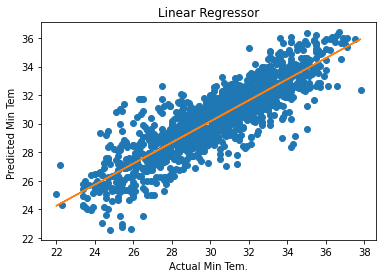

In [377]:
res=pd.DataFrame()
res['Actual']=y1_test
res['Predict']=rd1.predict(x_test)

print(res)

x=np.array(y1_test)
y=np.array(rd1.predict(x_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Actual Min Tem.')
plt.ylabel('Predicted Min Tem ')
plt.title('Linear Regressor')

# Tmin As Target Variable

In [329]:
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.20,random_state=726)

In [330]:
def fun2(f):
    f.fit(x_train,y2_train)
    pred=f.predict(x_test)
    print('Taining Score:-',f.score(x_train,y2_train)*100)
    print('Testing Score:-',f.score(x_test,y2_test)*100)
    print('Mean Absolute Error',mean_absolute_error(y2_test,pred))
    print('Mean Squared Error',mean_squared_error(y2_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y2_test,pred)))
    print('R2 Score',r2_score(y2_test,pred))

In [331]:
fun2(ln)

Taining Score:- 82.07775048377633
Testing Score:- 82.25066723587753
Mean Absolute Error 0.7913216393211322
Mean Squared Error 1.001086994785098
Root Mean Squared Erro 1.0005433497780583
R2 Score 0.8225066723587753


In [332]:
fun2(svr)

Taining Score:- 24.49104971118703
Testing Score:- 24.524662365926776
Mean Absolute Error 1.6362738381703192
Mean Squared Error 4.25691376327185
Root Mean Squared Erro 2.06322896530459
R2 Score 0.24524662365926775


In [333]:
fun2(svrl)

Taining Score:- 81.77763139447153
Testing Score:- 81.84537710069519
Mean Absolute Error 0.7887649521336373
Mean Squared Error 1.023945920742351
Root Mean Squared Erro 1.0119021300216493
R2 Score 0.8184537710069519


In [334]:
fun2(svrp)

Taining Score:- 39.974112044087605
Testing Score:- 40.19153753825068
Mean Absolute Error 1.4562752592939958
Mean Squared Error 3.373280266037657
Root Mean Squared Erro 1.8366491951479622
R2 Score 0.40191537538250677


In [336]:
fun2(dtc)

Taining Score:- 100.0
Testing Score:- 78.18558095108139
Mean Absolute Error 0.8152077151335312
Mean Squared Error 1.2303635014836796
Root Mean Squared Erro 1.1092175176599401
R2 Score 0.7818558095108139


In [337]:
fun2(knn)

Taining Score:- 80.99395192384262
Testing Score:- 68.93224670696102
Mean Absolute Error 1.0236350148367954
Mean Squared Error 1.752264391691395
Root Mean Squared Erro 1.3237312384662512
R2 Score 0.6893224670696102


# Regulization

In [338]:
fun2(ls)

Taining Score:- 3.867029349108908
Testing Score:- 3.5222263768010187
Mean Absolute Error 1.8561618079564335
Mean Squared Error 5.441480293570927
Root Mean Squared Erro 2.332698071669569
R2 Score 0.03522226376801019


In [339]:
fun2(rd)

Taining Score:- 82.03994950016666
Testing Score:- 82.24582315742327
Mean Absolute Error 0.7900674173853756
Mean Squared Error 1.001360207530992
Root Mean Squared Erro 1.0006798726520845
R2 Score 0.8224582315742327


In [340]:
fun2(es)

Taining Score:- 5.667789852417426
Testing Score:- 5.478549181112435
Mean Absolute Error 1.8368202996146283
Mean Squared Error 5.331140973044109
Root Mean Squared Erro 2.3089263680429717
R2 Score 0.054785491811124354


# Ensemble Method

In [341]:
fun2(rf)

Taining Score:- 98.52051973532744
Testing Score:- 89.95634076910773
Mean Absolute Error 0.5796661721068251
Mean Squared Error 0.5664763160237392
Root Mean Squared Erro 0.75264620906754
R2 Score 0.8995634076910772


In [342]:
fun2(gd)

Taining Score:- 89.98957938169863
Testing Score:- 87.73481640466755
Mean Absolute Error 0.6491236915995686
Mean Squared Error 0.6917733725043428
Root Mean Squared Erro 0.8317291461193017
R2 Score 0.8773481640466756


In [344]:
fun2(ad)

Taining Score:- 80.69424853312162
Testing Score:- 79.68157989438622
Mean Absolute Error 0.8689866676158821
Mean Squared Error 1.1459870854089336
Root Mean Squared Erro 1.070507863310183
R2 Score 0.7968157989438622


In [345]:
fun2(sgd)

Taining Score:- -2.5433457772800324e+25
Testing Score:- -2.490779201727302e+25
Mean Absolute Error 1183370938384.6655
Mean Squared Error 1.4048340288997264e+24
Root Mean Squared Erro 1185256946362.1492
R2 Score -2.490779201727302e+23


In [346]:
fun2(bg)

Taining Score:- 97.82288368934448
Testing Score:- 88.45764394813108
Mean Absolute Error 0.6262759643916914
Mean Squared Error 0.6510048961424334
Root Mean Squared Erro 0.806848744277658
R2 Score 0.8845764394813108


# Hyper Tunning For Best Score

RabdomForest Regression

In [361]:
p1={'criterion':['mse','absolute_error','possion'],'n_estimators':[10,50,75,100,200,250,500],'max_features':['auto','log2','sqrt'],'bootstrap':['True','False']}

In [362]:
gd1=GridSearchCV(rf,p1)
gd1.fit(x,y2)
print(gd1.best_params_)

{'bootstrap': 'True', 'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 250}


In [363]:
rf2=RandomForestRegressor(criterion='mse',n_estimators=250,max_features='auto',bootstrap=True)

In [364]:
fun2(rf2)

Taining Score:- 98.5863751617406
Testing Score:- 89.89184338174069
Mean Absolute Error 0.5801916913946581
Mean Squared Error 0.5701140581602366
Root Mean Squared Erro 0.7550589766105934
R2 Score 0.8989184338174069


Linear Regression

In [349]:
p4=[{'fit_intercept':['True','False'],'normalize':['True','False'],'copy_X':['True','False'],'n_jobs':[-1,1,2]}]

In [351]:
gd2=GridSearchCV(ln,p4)
gd2.fit(x,y2)
print(gd2.best_params_)

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': -1, 'normalize': 'True'}


In [367]:
ln2=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=-1,normalize=True)

In [368]:
fun2(ln2)

Taining Score:- 82.07775048377628
Testing Score:- 82.25066723587753
Mean Absolute Error 0.7913216393211328
Mean Squared Error 1.0010869947850976
Root Mean Squared Erro 1.000543349778058
R2 Score 0.8225066723587753


Ridge

In [354]:
p3={'alpha':[0.1,0.001,0.0001,0.01,1,10],'fit_intercept':['True','False'],'normalize':['True','False'],'copy_X':['True','False'],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs'],'max_iter':[1000,1500,2000,5000,15000]}

In [355]:
gd2=GridSearchCV(rd,p3)
gd2.fit(x,y2)
print(gd2.best_params_)

{'alpha': 0.01, 'copy_X': 'False', 'fit_intercept': 'False', 'max_iter': 1500, 'normalize': 'False', 'solver': 'saga'}


In [356]:
rd2=Ridge(alpha=0.01,copy_X=False,fit_intercept=False,max_iter=1500,normalize=False,solver='saga',random_state=726)

In [357]:
fun2(rd2)

Taining Score:- 81.63644335708172
Testing Score:- 81.71077075855673
Mean Absolute Error 0.8025535150912798
Mean Squared Error 1.031537905202905
Root Mean Squared Erro 1.0156465454098218
R2 Score 0.8171077075855673


# Cross Validation

In [369]:
for i in range(2,11):
    score=cross_val_score(ln2,x,y2,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.8018248019508716
At CV= 3 0.7731560662358169
At CV= 4 0.7801141246487732
At CV= 5 0.7700329011066905
At CV= 6 0.7473379922707029
At CV= 7 0.752659623308458
At CV= 8 0.7681255704275038
At CV= 9 0.7185443700907137
At CV= 10 0.73766100207732


In [366]:
for i in range(2,11):
    score=cross_val_score(rd2,x,y2,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.7933249577603665
At CV= 3 0.7667985941977529
At CV= 4 0.7756561161895912
At CV= 5 0.7670801408874877
At CV= 6 0.7440065089601914
At CV= 7 0.7491168552194305
At CV= 8 0.7635862701645115
At CV= 9 0.7117974178642732
At CV= 10 0.7344038527199197


In [365]:
for i in range(2,11):
    score=cross_val_score(rf2,x,y2,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.7848724054784516
At CV= 3 0.7646990874551286
At CV= 4 0.7814965770157031
At CV= 5 0.7792253405511638
At CV= 6 0.75051409234475
At CV= 7 0.7522956078444073
At CV= 8 0.7756964837571381
At CV= 9 0.7215434381443568
At CV= 10 0.7379493163281589


# Model Saving

Based on R2 Score ,RMSE and CV Score we get Best OutPut In Linear Regression.

In [370]:
import pickle
filename='Tmin_Prediction.pkl'
pickle.dump(ln2,open(filename,'wb'))

      Actual    Predict
7046    27.1  26.038163
4356    23.3  24.293910
1647    22.8  21.024091
2019    23.9  22.584803
4498    20.2  21.030984
...      ...        ...
6985    23.0  23.423218
5969    24.8  24.241376
1384    19.9  21.169081
6013    26.3  25.731830
570     24.4  24.721824

[1348 rows x 2 columns]


Text(0.5, 1.0, 'Linear Regressor')

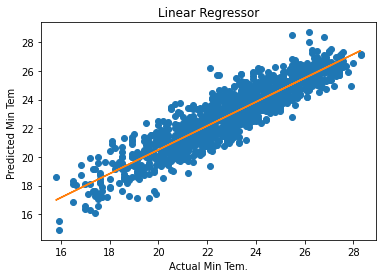

In [372]:
res=pd.DataFrame()
res['Actual']=y2_test
res['Predict']=ln2.predict(x_test)

print(res)

x=np.array(y2_test)
y=np.array(ln2.predict(x_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Actual Min Tem.')
plt.ylabel('Predicted Min Tem ')
plt.title('Linear Regressor')